In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from tensorflow.python.keras import Input
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import median_absolute_error, mean_absolute_percentage_error
from numpy import arange



In [9]:
data = pd.read_csv('dataset/train.csv')
print(data.head(10))

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...       

## Try to clean and select the feature in to new csv file
- Select the feature that want
- use to_csv to make a new csv file
    

In [11]:
data = data[['Id','GrLivArea','TotRmsAbvGrd','1stFlrSF','GarageArea','SalePrice']]
data.to_csv('dataset/cleanData.csv', index=False)

## Compare the data into the graph
- This give a visualize of the data to the graph 

In [50]:
data_num = data.select_dtypes(include = ['float64' , 'int64'])
data_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


There are 1460 instances.
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePri

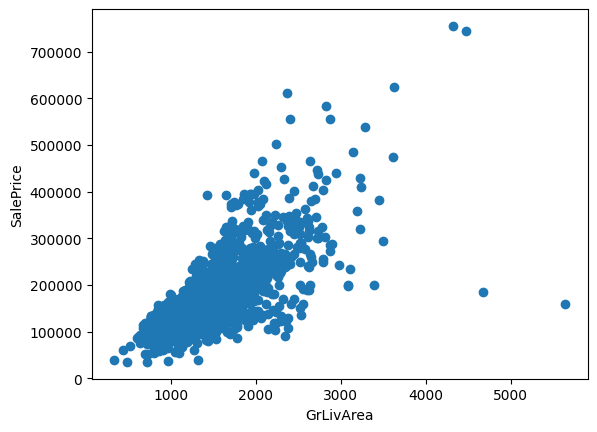

In [31]:
data = pd.read_csv('dataset/train.csv')
print(f"There are {len(data.index)} instances.")
print(data.head())
plt.scatter(data['GrLivArea'], data['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

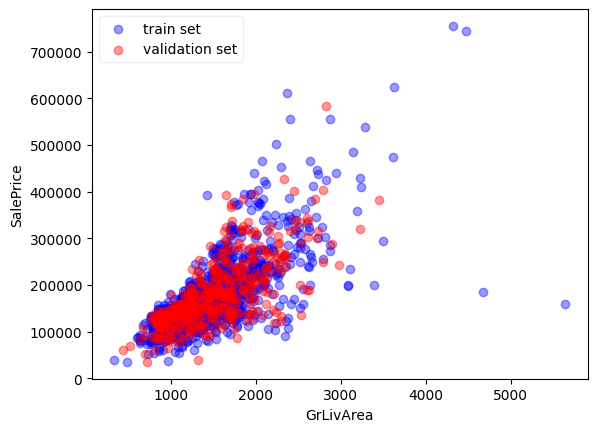

In [42]:
def split_dataset(data, train_frac=0.7):
    train = data.sample(frac=train_frac)
    val = data.drop(train.index)
    return train, val
    
# Split data into train and validation:
train, validation = split_dataset(data, train_frac=0.7)
plt.scatter(train['GrLivArea'], train['SalePrice'], c='blue', alpha=0.4)
plt.scatter(validation['GrLivArea'], validation['SalePrice'], c='red', alpha=0.4)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend(['train set', 'validation set'], framealpha=0.3)
plt.show()


## Create a model

In [56]:
model = Sequential()
model.add(Input(shape=(6,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 256)               1792      
_________________________________________________________________
dense_13 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 65        
Total params: 43,009
Trainable params: 43,009
Non-trainable params: 0
_________________________________________________________________
None


## Train

In [57]:
# Train:
loss = 'mse'
metric = 'mae'

epochs = 1000

x_train, y_train = train[['GrLivArea','YearRemodAdd','TotRmsAbvGrd','1stFlrSF','2ndFlrSF','GarageArea']], train['SalePrice']
x_val, y_val = validation[['GrLivArea','YearRemodAdd','TotRmsAbvGrd','1stFlrSF','2ndFlrSF','GarageArea']], validation['SalePrice']
model.compile(loss=loss, optimizer='adam', metrics=[metric])
history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, verbose=1, validation_data=(x_val, y_val))


Epoch 1/1000
16/16 [==============================] - 1s 25ms/step - loss: 38799065088.0000 - mae: 179059.3438 - val_loss: 37488791552.0000 - val_mae: 179632.7188
Epoch 2/1000
16/16 [==============================] - 0s 6ms/step - loss: 36341792768.0000 - mae: 172464.0938 - val_loss: 32705650688.0000 - val_mae: 166492.8281
Epoch 3/1000
16/16 [==============================] - 0s 16ms/step - loss: 27695843328.0000 - mae: 146646.3750 - val_loss: 18363013120.0000 - val_mae: 119266.2891
Epoch 4/1000
16/16 [==============================] - 0s 7ms/step - loss: 10668542976.0000 - mae: 75161.5391 - val_loss: 2725547264.0000 - val_mae: 37310.6211
Epoch 5/1000
16/16 [==============================] - 0s 6ms/step - loss: 4099230720.0000 - mae: 49273.4766 - val_loss: 2871677440.0000 - val_mae: 42492.0469
Epoch 6/1000
16/16 [==============================] - 0s 6ms/step - loss: 3530852096.0000 - mae: 39256.7344 - val_loss: 2687240448.0000 - val_mae: 36681.8633
Epoch 7/1000
16/16 [=================

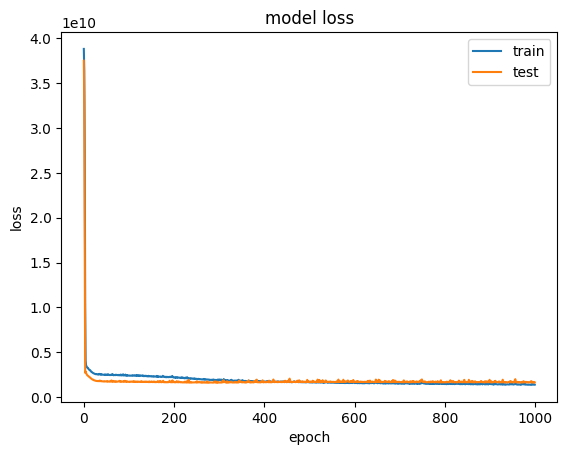

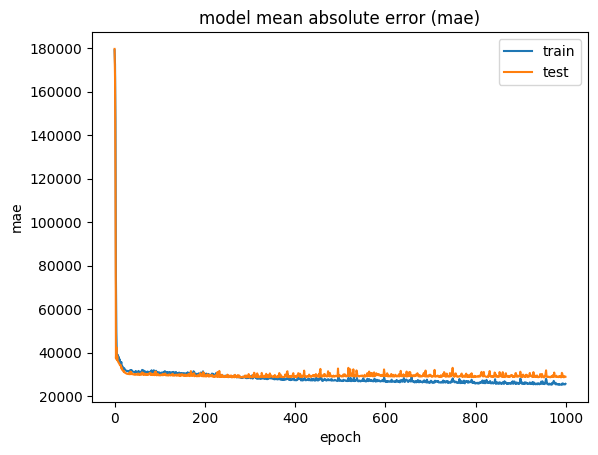

In [58]:
# Display loss:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
# Display metric:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mean absolute error (mae)')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

